## Numerical experiments math and Data Science Project
#### Authors: Beltrame and Marchionne

In the following, we are presenting the results of the numerical experiments associated to the following papers:

- Training ReLU networks to high uniform accuracy is intractable; Julius Berner; Philipp Grohs and Felix Voigtlaender

- On the Complexity of Learning Neural Networks; Le Song et Al.

The numerical experiments aim to prove that we can find relevant and domain-specific problems of usign neural networks in solving even simple tasks.


## 1) x $\rightarrow$ log(sin(50x) + 2) + sin(5x)

In this example we can see that if we set an arbitrary resolution, the error associated with the 2-norm (the mean squared error) remains small, while the error associated with the 1-norm (the absolute error) presents bigger results.

This feature might lead to severe domain-specific issues when applied in a real-world scenario.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import time
import matplotlib.pyplot as plt
    
# custom
from Functions import plot_result, MLPRegressor, train, create_dataset, set_up_MLP

Let's start with an illustrative example.

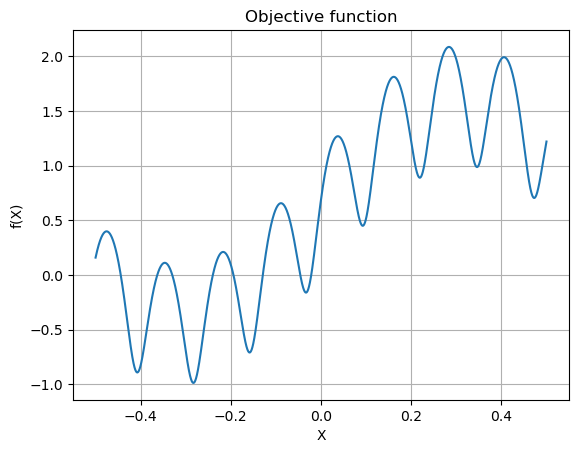

In [2]:
# define x
epsilon = 0.0001
x = np.arange(-0.5, 0.5, epsilon)
x_init = x
function = lambda x : np.log(np.sin(50 * x) + 2) + np.sin(5*x)
fx = [function(e) for e in x]
plot_result(x_init, fx, "X", "f(X)", "Objective function")

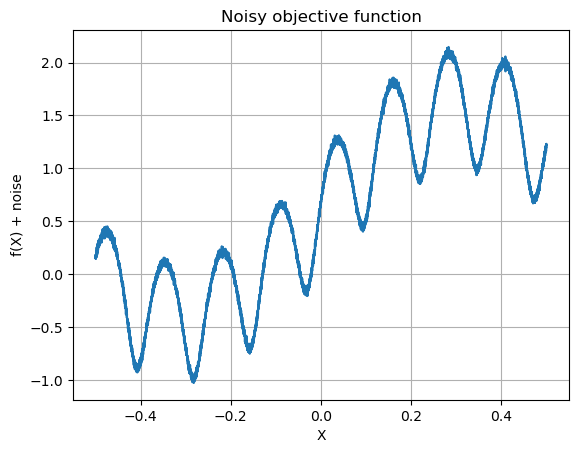

In [3]:
noise = np.random.normal(scale = 0.02, size=len(x))
y = fx + noise
plot_result(x_init, y, "X", "f(X) + noise", "Noisy objective function")

In [4]:
x_train, x_test, y_train, y_test = create_dataset(x, y)

Use a Multi Layered Perceptron (MLP) to solve the Machine Learning (ML) problem.

In [5]:
model = set_up_MLP(x_train, seed=123, B=100, L=5, drop_out_p=0.3, info=False)

##### Training loop

In [6]:
losses, preds, diffs, actuals, model, valid_results_dict, epochs = train(
            model=model, y_train=y_train, 
            categorical_train=[], 
            continuous_train=x_train,
            y_test=y_test, 
            categorical_valid=[],
            continuous_valid=x_test,
            learning_rate=0.01, 
            epochs=3000, 
            print_out_interval=300, 
            continuous=True)

epoch:   1  loss: 1.27371359
epoch: 301  loss: 0.29092178
epoch: 601  loss: 0.21609198
epoch: 901  loss: 0.18654048
epoch: 1201  loss: 0.16240902
epoch: 1501  loss: 0.16356750
epoch: 1801  loss: 0.15744917
epoch: 2101  loss: 0.15156931
epoch: 2401  loss: 0.15041961
epoch: 2701  loss: 0.14981738
epoch: 3000  loss: 0.14539751
Duration: 133 seconds
RMSE: 0.16024177


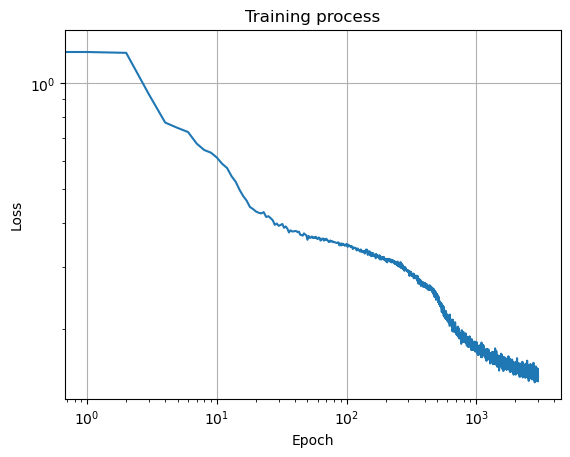

In [7]:
new_losses = [loss.detach().numpy() for loss in losses]

plot_result(np.arange(len(losses)), new_losses,"Epoch", "Loss", "Training process", loglog=True)

[]

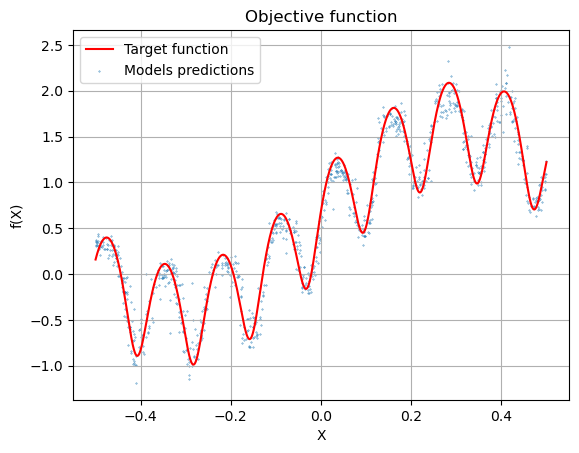

In [8]:
import matplotlib.pyplot as plt
plt.plot(x_init, fx, label="Target function", color="red")
plt.scatter(x_test, preds, label="Models predictions", s=0.1)
#plt.scatter(x, y, label="Sampled data")
plt.grid()
plt.xlabel("X")
plt.ylabel("f(X)")
plt.title("Objective function")
plt.legend()
plt.plot()